In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from datetime import datetime

In [2]:
filename = "C:/Users/rodlu/OneDrive/Escritorio/Coding_Dojo/Data_Science/Data sets/credit_customers.csv"
df = pd.read_csv(filename)
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


Limpieza y exploración de datos 

In [3]:
# Crear una copia del dataframe original
df_1 = df.copy()

In [4]:
# verificar filas duplicadas
df_1.duplicated().sum()

0

In [5]:
#inspeccionar la data
print(df_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [6]:
print(df_1.isna().sum())

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64


In [7]:
# imprimir estadisticas descriptivas de las variables numericas
print(df_1.describe())

          duration  credit_amount  installment_commitment  residence_since  \
count  1000.000000    1000.000000             1000.000000      1000.000000   
mean     20.903000    3271.258000                2.973000         2.845000   
std      12.058814    2822.736876                1.118715         1.103718   
min       4.000000     250.000000                1.000000         1.000000   
25%      12.000000    1365.500000                2.000000         2.000000   
50%      18.000000    2319.500000                3.000000         3.000000   
75%      24.000000    3972.250000                4.000000         4.000000   
max      72.000000   18424.000000                4.000000         4.000000   

               age  existing_credits  num_dependents  
count  1000.000000       1000.000000     1000.000000  
mean     35.546000          1.407000        1.155000  
std      11.375469          0.577654        0.362086  
min      19.000000          1.000000        1.000000  
25%      27.000000    

In [8]:
df_1['checking_status'].value_counts()

no checking    394
<0             274
0<=X<200       269
>=200           63
Name: checking_status, dtype: int64

In [9]:
df_1['credit_history'].value_counts()

existing paid                     530
critical/other existing credit    293
delayed previously                 88
all paid                           49
no credits/all paid                40
Name: credit_history, dtype: int64

In [10]:
df_1['purpose'].value_counts()

radio/tv               280
new car                234
furniture/equipment    181
used car               103
business                97
education               50
repairs                 22
domestic appliance      12
other                   12
retraining               9
Name: purpose, dtype: int64

In [11]:
df_1['savings_status'].value_counts()

<100                603
no known savings    183
100<=X<500          103
500<=X<1000          63
>=1000               48
Name: savings_status, dtype: int64

In [12]:
df_1['employment'].value_counts()

1<=X<4        339
>=7           253
4<=X<7        174
<1            172
unemployed     62
Name: employment, dtype: int64

In [13]:
df_1['personal_status'].value_counts()

male single           548
female div/dep/mar    310
male mar/wid           92
male div/sep           50
Name: personal_status, dtype: int64

In [14]:
df_1['other_parties'].value_counts()

none            907
guarantor        52
co applicant     41
Name: other_parties, dtype: int64

In [15]:
df_1['property_magnitude'].value_counts()

car                  332
real estate          282
life insurance       232
no known property    154
Name: property_magnitude, dtype: int64

In [16]:
df_1['other_payment_plans'].value_counts()

none      814
bank      139
stores     47
Name: other_payment_plans, dtype: int64

In [17]:
df_1['housing'].value_counts()

own         713
rent        179
for free    108
Name: housing, dtype: int64

In [18]:
df_1['job'].value_counts()

skilled                      630
unskilled resident           200
high qualif/self emp/mgmt    148
unemp/unskilled non res       22
Name: job, dtype: int64

In [19]:
df_1['own_telephone'].value_counts()

none    596
yes     404
Name: own_telephone, dtype: int64

In [20]:
df_1['foreign_worker'].value_counts()

yes    963
no      37
Name: foreign_worker, dtype: int64

In [21]:
# eliminar la columna 'checking_status'
df_1.drop('checking_status', axis=1, inplace=True)
# Reemplazar valores inconsistentes en la columna 'credit_history': 'no credits/all paid' por 'no credits'
df_1['credit_history'] = df_1['credit_history'].replace('no credits/all paid', 'no credits')
df_1['credit_history'] = df_1['credit_history'].replace('all paid', 'no credits')
# Reemplazar valores con mwnos de 90 en la columna 'purpose' por 'other'
df_1['purpose'] = df_1['purpose'].replace('education', 'other')
df_1['purpose'] = df_1['purpose'].replace('repairs', 'other')
df_1['purpose'] = df_1['purpose'].replace('domestic appliance', 'other')
df_1['purpose'] = df_1['purpose'].replace('retraining', 'other')
# Reemplazar valores por > 100 y mantener < 100 y 'no known savings'
df_1['savings_status'] = df_1['savings_status'].replace('100<=X<500', '>100')
df_1['savings_status'] = df_1['savings_status'].replace('500<=X<1000', '>100')
df_1['savings_status'] = df_1['savings_status'].replace('>=1000', '>100')
# eliminar la columna 'employment'
df_1.drop('employment', axis=1, inplace=True)
# Dividir la columna personal_status en dos clumnas: gender y marital_status
df_1[['gender', 'marital_status']] = df_1['personal_status'].str.split(' ', n=1, expand=True)
# Eliminar la columna 'personal_status'
df_1.drop('personal_status', axis=1, inplace=True)
# Reemplazar valores en la columna 'marital_status'
df_1['marital_status'] = df_1['marital_status'].replace('mar/wid', 'not single')
df_1['marital_status'] = df_1['marital_status'].replace('div/sep', 'not single')
df_1['marital_status'] = df_1['marital_status'].replace('div/dep/mar', 'not single')
# eliminar la columna 'other_parties'
df_1.drop('other_parties', axis=1, inplace=True)
# eliminar la columna 'other_payment_plans'
df_1.drop('other_payment_plans', axis=1, inplace=True)
# convertir la columna 'job' en una columna binaria skilled y unskilled
df_1['job']=df_1['job'].replace('unemp/unskilled non res', 'unskilled')
df_1['job']=df_1['job'].replace('unskilled resident', 'unskilled')
df_1['job']=df_1['job'].replace('high qualif/self emp/mgmt', 'skilled')
# eliminar la columna 'own_telephone'
df_1.drop('own_telephone', axis=1, inplace=True)
# eliminar la columna 'foreign_worker'
df_1.drop('foreign_worker', axis=1, inplace=True)
# convertir la columna objetivo en numerica
df_1['class']=df_1['class'].replace('good', 1)
df_1['class']=df_1['class'].replace('bad', 0)

In [22]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   duration                1000 non-null   float64
 1   credit_history          1000 non-null   object 
 2   purpose                 1000 non-null   object 
 3   credit_amount           1000 non-null   float64
 4   savings_status          1000 non-null   object 
 5   installment_commitment  1000 non-null   float64
 6   residence_since         1000 non-null   float64
 7   property_magnitude      1000 non-null   object 
 8   age                     1000 non-null   float64
 9   housing                 1000 non-null   object 
 10  existing_credits        1000 non-null   float64
 11  job                     1000 non-null   object 
 12  num_dependents          1000 non-null   float64
 13  class                   1000 non-null   int64  
 14  gender                  1000 non-null   o

In [23]:
df_1.head()

,duration,credit_history,purpose,credit_amount,savings_status,installment_commitment,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,class,gender,marital_status
0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,4.0,4.0,real estate,67.0,own,2.0,skilled,1.0,1,male,single
1,48.0,existing paid,radio/tv,5951.0,<100,2.0,2.0,real estate,22.0,own,1.0,skilled,1.0,0,female,not single
2,12.0,critical/other existing credit,other,2096.0,<100,2.0,3.0,real estate,49.0,own,1.0,unskilled,2.0,1,male,single
3,42.0,existing paid,furniture/equipment,7882.0,<100,2.0,4.0,life insurance,45.0,for free,1.0,skilled,2.0,1,male,single
4,24.0,delayed previously,new car,4870.0,<100,3.0,4.0,no known property,53.0,for free,2.0,skilled,2.0,0,male,single


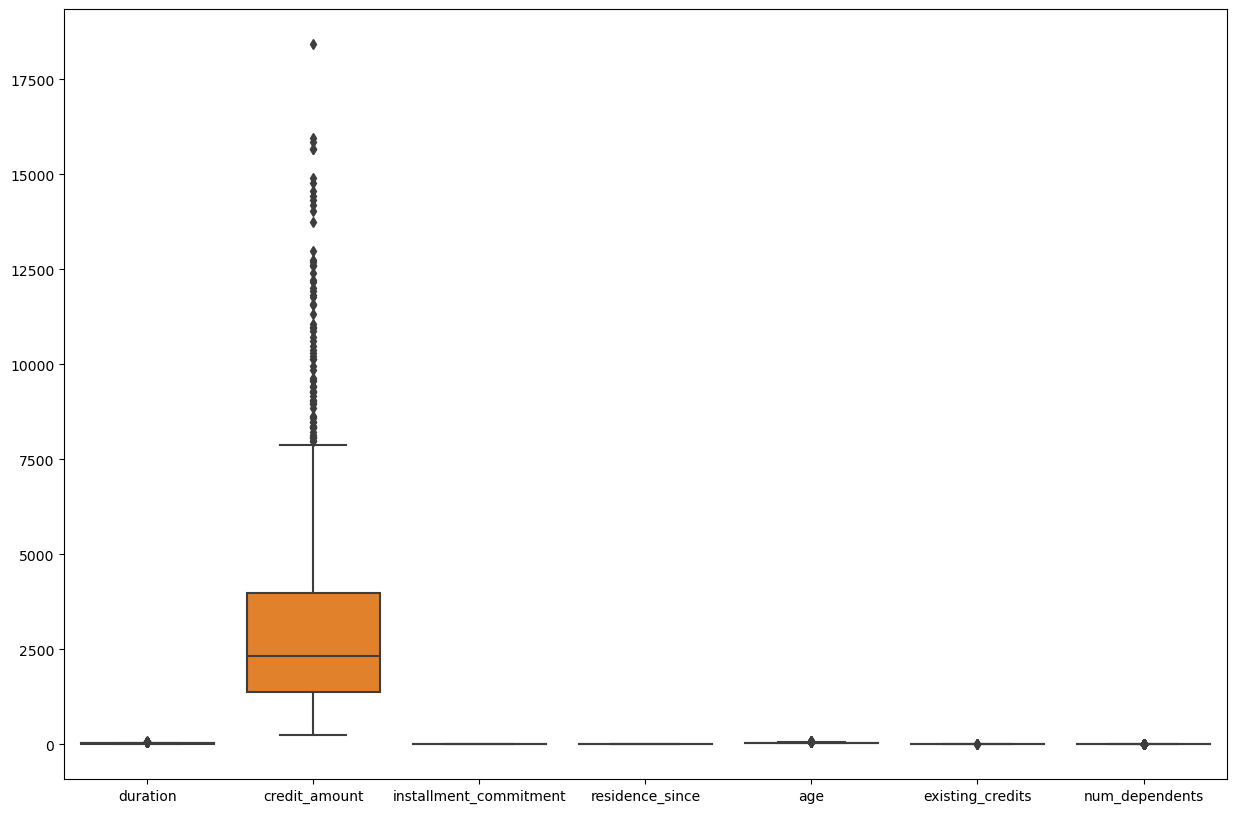

In [24]:
# Boxplot de las variables numéricas para ver outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_1[['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']])
plt.show()

Visualización de datos

C:\Users\rodlu\AppData\Local\Temp\ipykernel_17740\463216756.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_1.corr()


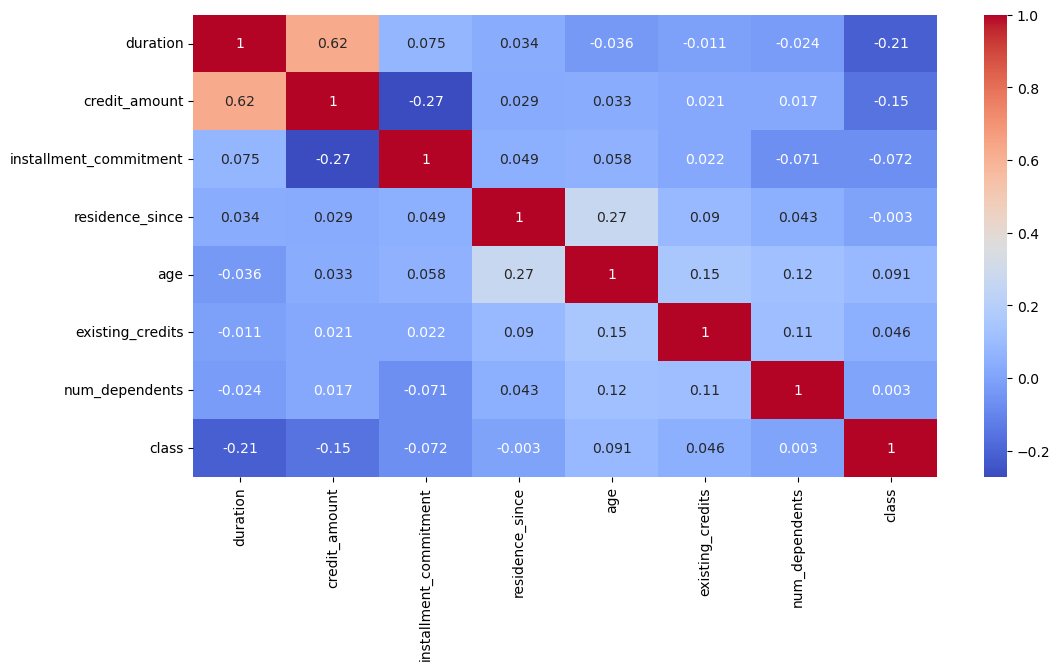

Características con una correlación de magnitud 0.5 o mayor con la clase: ['class']


In [25]:
# Generar matriz de correlaciones
corr_matrix = df_1.corr()
# Crear mapa de calor
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
# Mostrar mapa de calor
plt.show()
# Obtener las características que tienen una correlación de magnitud 0,5 o mayor con el precio
corr_threshold = 0.5
corr_features = corr_matrix[(corr_matrix['class'] >= corr_threshold) | (corr_matrix['class'] <= -corr_threshold)].index.tolist()
# Imprimir las características encontradas
print("Características con una correlación de magnitud {} o mayor con la clase: {}".format(corr_threshold, corr_features))

In [47]:
df_1.groupby('class')['housing'].value_counts()

class  housing 
0      own         186
       rent         70
       for free     44
1      own         527
       rent        109
       for free     64
Name: housing, dtype: int64

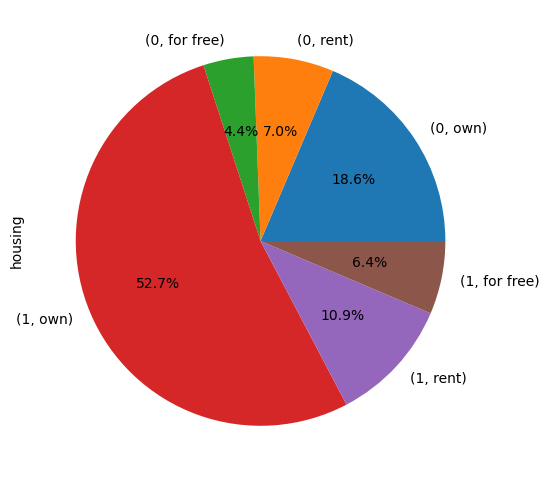

In [26]:
# grafico de pie de la variable housing por clase
plt.figure(figsize=(10, 6))
df_1.groupby('class')['housing'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

In [31]:
df_1.groupby('class')['purpose'].value_counts()

class  purpose            
0      new car                 89
       radio/tv                62
       furniture/equipment     58
       other                   40
       business                34
       used car                17
1      radio/tv               218
       new car                145
       furniture/equipment    123
       used car                86
       other                   65
       business                63
Name: purpose, dtype: int64

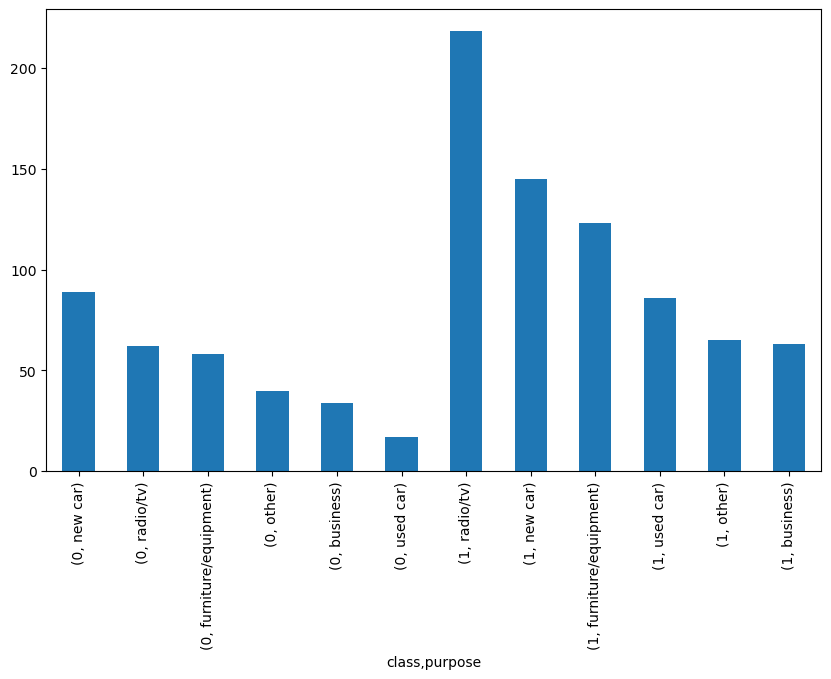

In [27]:
# grafico de barras de la variable purpose por clase
plt.figure(figsize=(10, 6))
df_1.groupby('class')['purpose'].value_counts().plot(kind='bar')
plt.show()

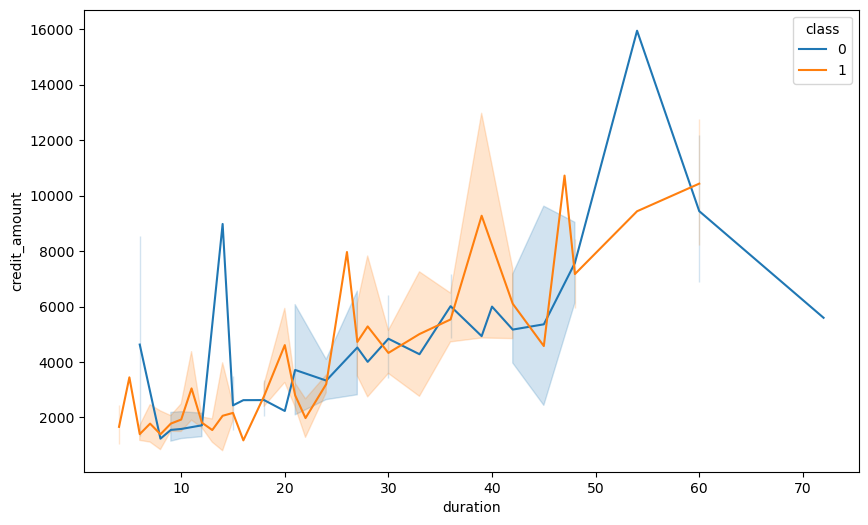

In [35]:
# grafico lineal credito amount por duracion 
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_1, x='duration', y='credit_amount', hue='class')
plt.savefig('grafico.png')
plt.show()

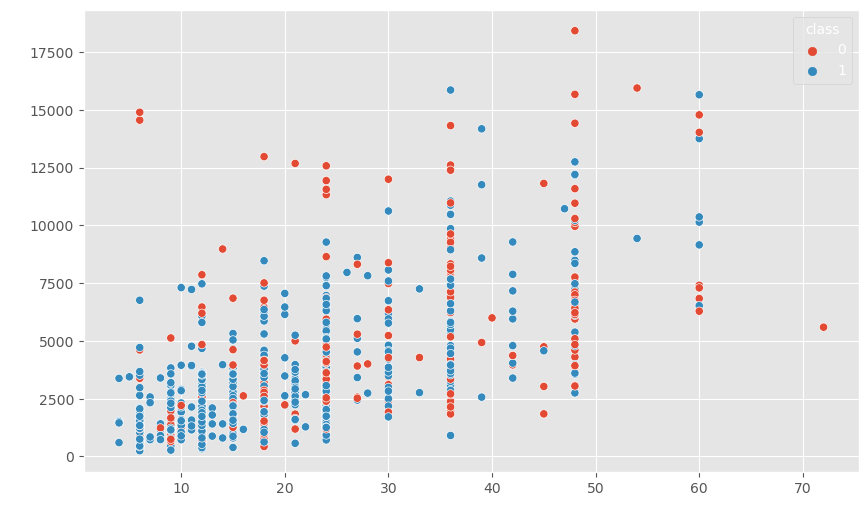

In [43]:
# grafico lineal credito amount por duracion 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_1, x='duration', y='credit_amount', hue='class')
plt.show()

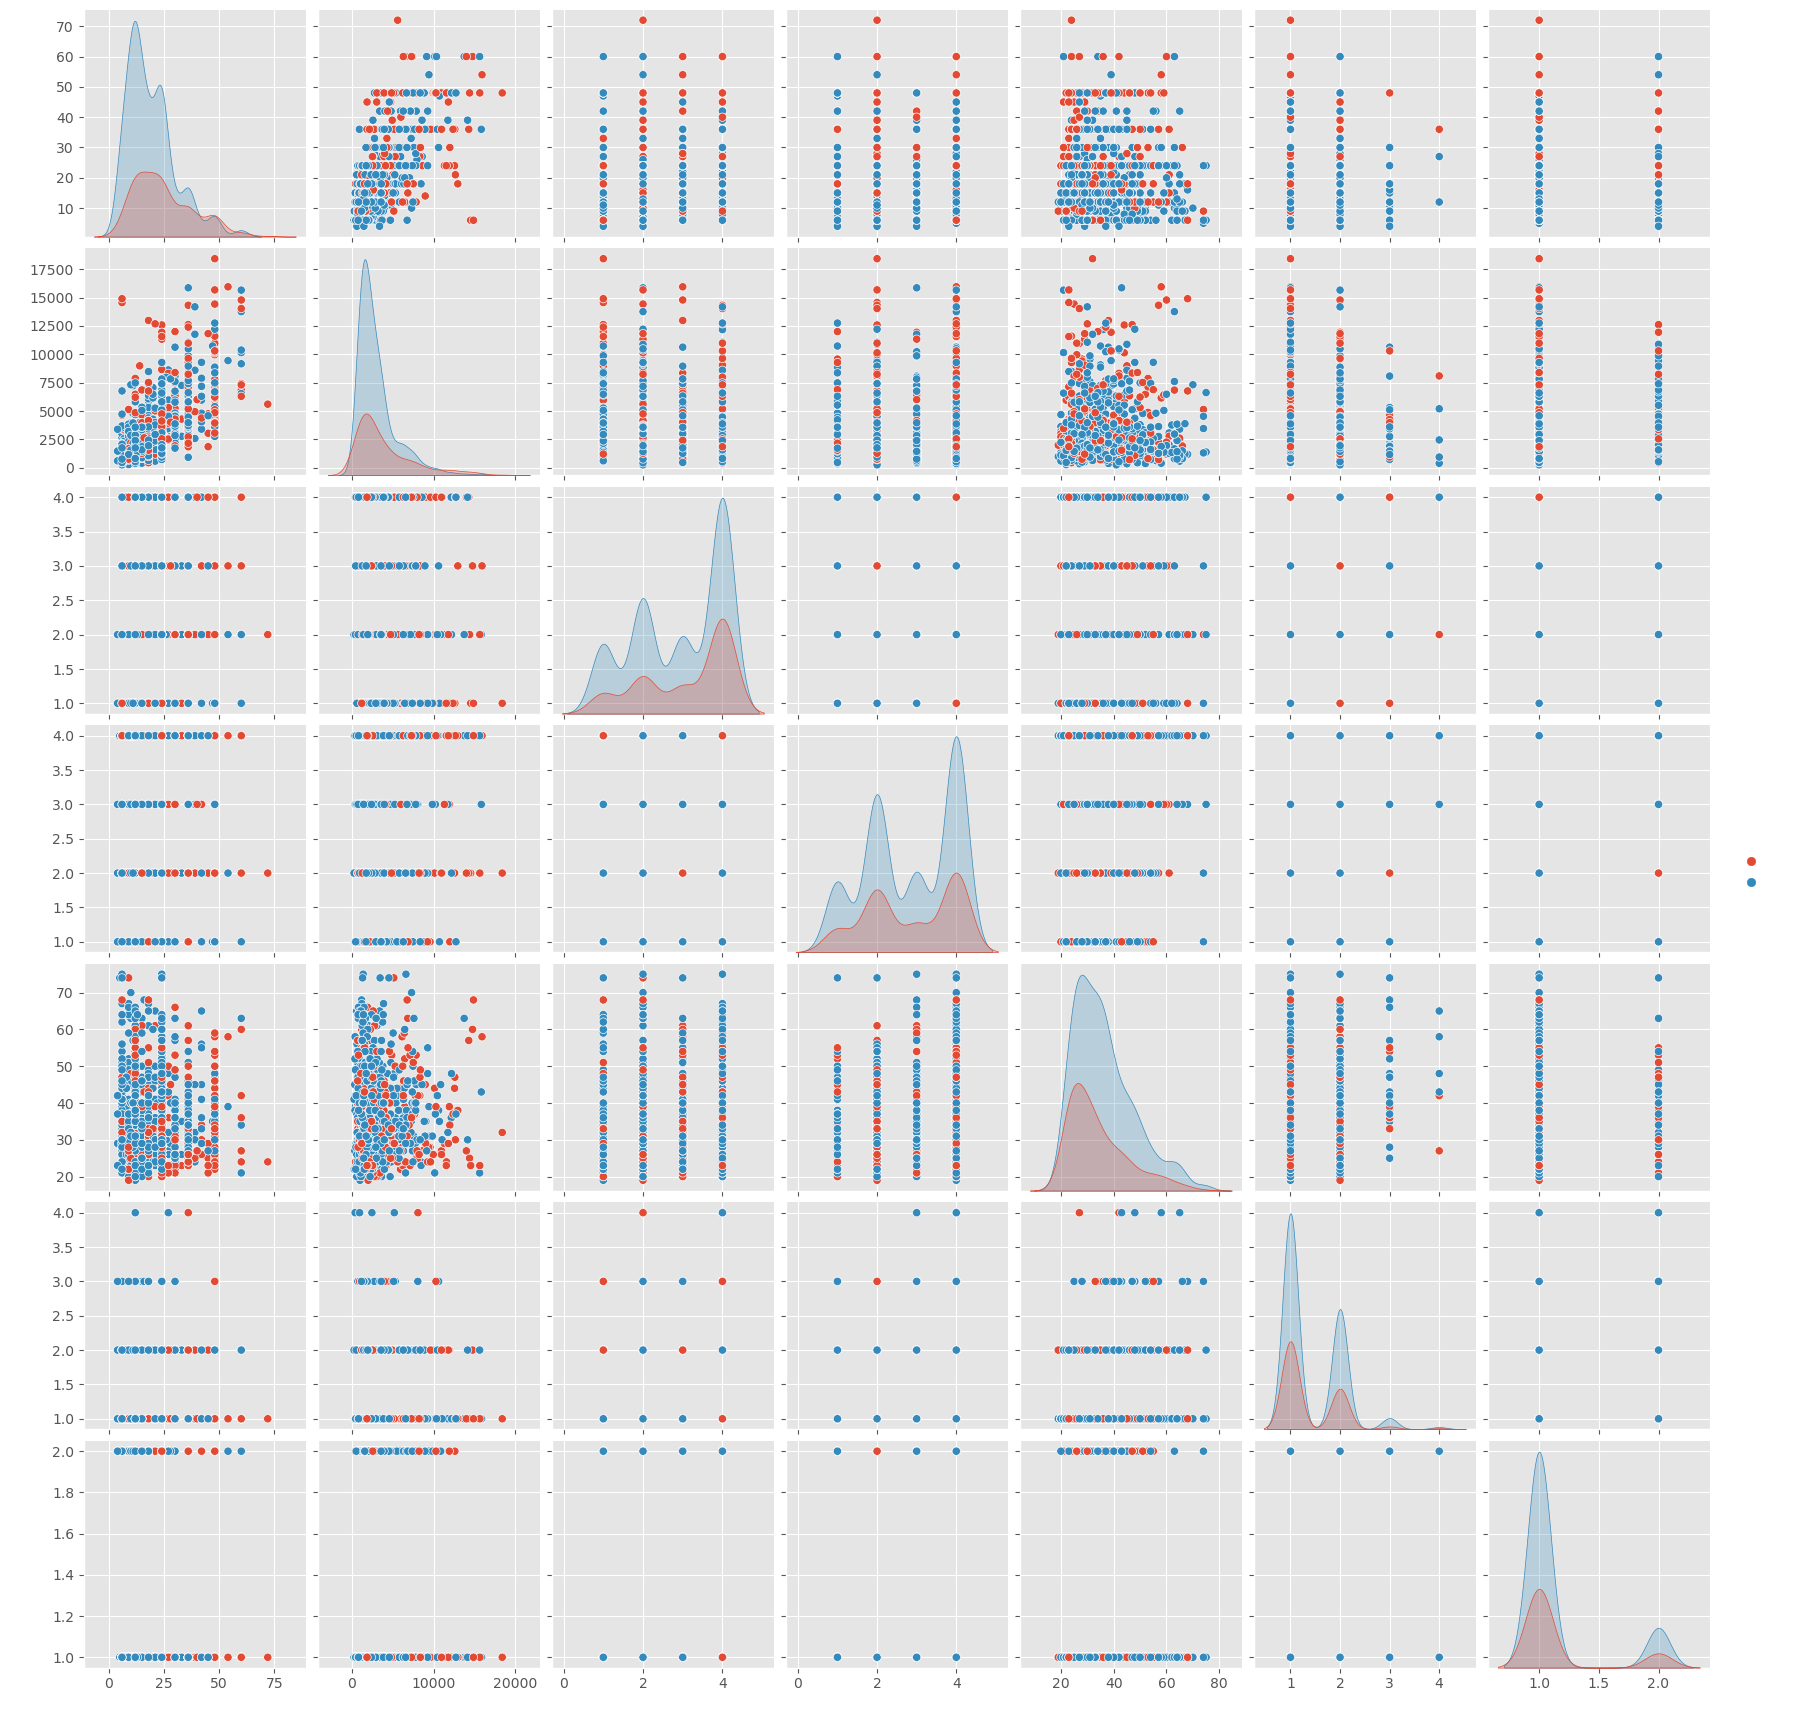

In [46]:
# visualizar la relación entre las variables numericas
sns.pairplot(df_1[['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents', 'class']], hue='class')
plt.show()

Introducción y antecedentes del conjunto de datos:
El conjunto de datos contiene 1000 filas y 21 columnas con 13 columnas categóricas, 7 columnas numéricas y una columna objetivo 'Class'. Se realizó un proceso de limpieza de datos para facilitar el análisis. El objetivo está desbalanceado y se convirtió a numérico en el preprocesamiento. Algunas columnas categóricas tuvieron valores inconsistentes, mientras que otras tuvieron demasiadas categorías y se agruparon en menos categorías. Las columnas 'Checking_status', 'employment', 'other_parties' y 'own_telephone' se eliminaron porque no eran relevantes para el modelo. Los valores de las columnas que se eliminaron eran inconsistentes y en algunos casos con casi todos los valores iguales.

Las columnas 'credit_history', 'purpose', 'savings_status' y 'property_magnitude' se convirtieron en dummy. La columna 'personal_status' se renombró a 'gender' y se convirtió en dummy. La columna 'job' se convirtió en binaria. La columna 'foreign_worker' se eliminó porque no era relevante para el modelo.

Visualización de datos:
La matriz de correlación muestra que la variable que tiene la mayor correlación con la variable objetivo es 'credit_amount'. El resto de las variables numéricas no tienen una correlación significativa con la variable objetivo.

En el gráfico de pastel podemos ver que la mayoría de los clientes buenos o malos tienen casa propia. Esto indica que aquellos que tienen casa propia son más propensos a tomar créditos.

En el gráfico de barras podemos ver que la mayoría de los créditos aprobados son para comprar televisores, seguidos por créditos para comprar autos. Los créditos más rechazados por el banco son para comprar autos.

En los graficos de densidad y lineal podemos ver que la mayoria de los creditos rechazados tenian una duración alta y los montos aprobados eran bajos y tenian una duración baja.

En el gráfico pairplot podemos ver que la variable 'credit_amount' tiene una distribución asimétrica positiva, lo que indica que la mayoría de los clientes toman créditos pequeños. Se puede observar que hay más clientes buenos que malos en el dataset.

Además, es importante destacar que la limpieza de datos y la conversión de variables categóricas en numéricas o binarias permitió un análisis más preciso y una mejor interpretación de los resultados. También es importante mencionar que el objetivo desbalanceado puede requerir técnicas de muestreo estratificado o de ponderación para obtener resultados más precisos en el modelo.

En conclusión, este conjunto de datos ofrece una buena oportunidad para analizar las características de los clientes y su relación con la aprobación de créditos, con la posibilidad de construir un modelo predictivo para predecir si un cliente será o no aprobado para un crédito.